In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.optimize import fmin

## Logistic Regression

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

### Load Data

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1','exam2','result'])

In [4]:
data.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exam1   100 non-null    float64
 1   exam2   100 non-null    float64
 2   result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.describe()

,exam1,exam2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plot Data

(array([4., 7., 4., 2., 3., 5., 6., 5., 6., 6., 5., 5., 8., 6., 8., 4., 1.,
        5., 5., 5.]),
 array([30.05882245, 33.54727421, 37.03572598, 40.52417775, 44.01262952,
        47.50108128, 50.98953305, 54.47798482, 57.96643659, 61.45488835,
        64.94334012, 68.43179189, 71.92024366, 75.40869542, 78.89714719,
        82.38559896, 85.87405073, 89.36250249, 92.85095426, 96.33940603,
        99.8278578 ]),
 <a list of 20 Patch objects>)

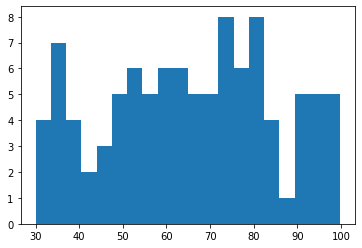

In [8]:
plt.hist(data.exam1, bins=20)

(array([ 1.,  1.,  4., 10.,  9.,  5.,  4.,  3.,  6.,  1.,  6.,  9.,  5.,
         9.,  3.,  1.,  8.,  5.,  2.,  8.]),
 array([30.60326323, 34.01657186, 37.42988049, 40.84318911, 44.25649774,
        47.66980636, 51.08311499, 54.49642361, 57.90973224, 61.32304086,
        64.73634949, 68.14965811, 71.56296674, 74.97627536, 78.38958399,
        81.80289262, 85.21620124, 88.62950987, 92.04281849, 95.45612712,
        98.86943574]),
 <a list of 20 Patch objects>)

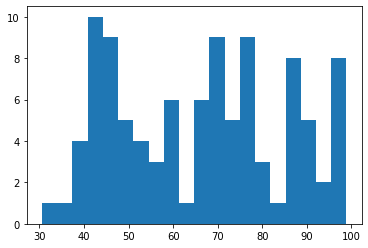

In [9]:
plt.hist(data.exam2, bins=20)

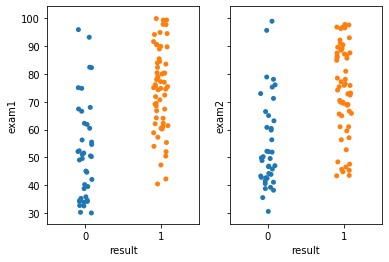

In [32]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.catplot(x="result", y="exam1", data=data, ax=axs[0])
sns.catplot(x="result", y="exam2", data=data, ax=axs[1])
plt.close(2)
plt.close(3)

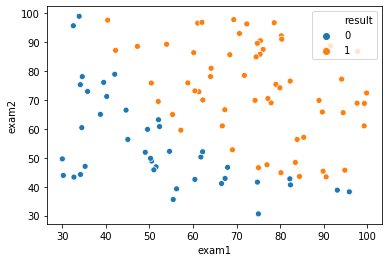

In [10]:
sns.scatterplot(x=data.exam1, y=data.exam2, hue=data.result)

###  Sigmoid Function

In [47]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [51]:
sigmoid(0)

0.5

In [49]:
X = np.linspace(-10,10,100)

In [50]:
sigmoid(X)

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

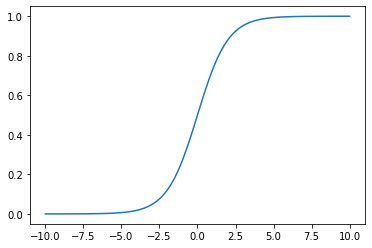

In [53]:
plt.plot(X,sigmoid(X))

### Cost Function

In [56]:
X = np.array([data['exam1'].to_numpy(), data['exam2'].to_numpy()])
y = data['result'].to_numpy()
m = len(y)

In [57]:
X = np.vstack((np.ones(m),X))

In [62]:
initial_theta = np.zeros(X.ndim+1)

In [93]:
def costFunction(theta,X,y, return_grad=False):
    prediction = sigmoid(theta.dot(X))
    J = (1/m)*np.sum(-y.dot(np.log(prediction))-(1-y).dot(np.log(1 - prediction)))
    grad = (1/m)*((prediction - y).dot(X.T))
    if return_grad:
        return J, grad
    else:
        return J

In [94]:
J, grad = costFunction(initial_theta, X, y, True)

In [95]:
print(J)
print(grad)

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


### Learning Parameters using minimize

In [92]:
myargs=(X,y)

In [96]:
theta = fmin(costFunction, x0=initial_theta, args=myargs)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [97]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

In [99]:
from scipy.optimize import minimize

In [110]:
result = minimize(costFunction, x0=initial_theta, args=myargs, method='Nelder-Mead')

In [111]:
theta = result.x

In [112]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

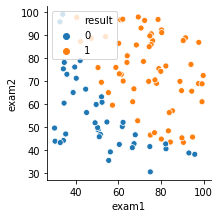

In [115]:
g = sns.FacetGrid(data)
g = sns.scatterplot(x=data.exam1, y=data.exam2, hue=data.result)
